In [194]:
import pandas as pd
import numpy as np

In [195]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
Unnamed: 0                                616656 non-null int64
Episode                                   616656 non-null object
Station                                   616656 non-null object
Channel Type                              616656 non-null object
Season                                    616656 non-null object
Year                                      616656 non-null int64
Date                                      616656 non-null object
Day of week                               616656 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616656 non-null int64
Name of show                              616656 non-null object
Name of episode                           394077 non-null object
Genre                                     61665

# Data Cleaning and Feature Engineering

First of all we should rename the column labels and remove whitespaces and reduce length of labels

In [196]:
# dealing with column names
df.rename(columns={"Temperature in Montreal during episode": "Temperature",
                   "Game of the Canadiens during episode?": "Game_of_canadiains",
                   "# of episode in the season": "Multiple_episode",
                   "Name of episode": "Name_episode",
                   "Day of week": "Weekday",
                   "Channel Type": "Channel_type",
                   "First time or rerun": "First_time",
                   "Market Share_total": "Total_market_share"}, inplace=True)

In [197]:
df.head()

,Unnamed: 0,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name of show,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [198]:
# removing first column (unnamed: 0) which is not necessary
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name of show,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [199]:
# checking columns of `Episod` and `Name of show` values
equal_two_columns = df['Episode'].equals(df['Name of show'])

if equal_two_columns: # True
    df.drop(columns=['Name of show'], inplace=True)
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [200]:
# handling "Name of episode" column
different_categories = len(df['Episode'].unique())
different_categories
# different categories is very large. not possible to use one-hot encoding.

# filling null values
df['Name_episode'] = df.apply(
    lambda row: row['Episode'] if pd.isnull(row['Name_episode']) else row['Name_episode'],
    axis=1
)
df.head()


,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18.250


In [201]:
# handling null values in Start/End_time
# few records have null values in `Start_time` and `End_time`. we remove them.
df = df.dropna(subset=['Start_time', 'End_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 18 columns):
Episode               616613 non-null object
Station               616613 non-null object
Channel_type          616613 non-null object
Season                616613 non-null object
Year                  616613 non-null int64
Date                  616613 non-null object
Weekday               616613 non-null object
Start_time            616613 non-null object
End_time              616613 non-null object
Length                616613 non-null int64
Name_episode          616613 non-null object
Genre                 616613 non-null object
First_time            616613 non-null object
Multiple_episode      616613 non-null object
Movie?                616613 non-null object
Game_of_canadiains    616613 non-null object
Total_market_share    616613 non-null float64
Temperature           533312 non-null float64
dtypes: float64(2), int64(2), object(14)
memory usage: 89.4+ MB


In [202]:
# handling and cleanning temperature column. 
# becuase rows are sorted with Start_time in one station we can use interpolation to fill nulls. 
df['Temperature'].interpolate(inplace=True)
df.Temperature = df.Temperature.astype(int)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 18 columns):
Episode               616613 non-null object
Station               616613 non-null object
Channel_type          616613 non-null object
Season                616613 non-null object
Year                  616613 non-null int64
Date                  616613 non-null object
Weekday               616613 non-null object
Start_time            616613 non-null object
End_time              616613 non-null object
Length                616613 non-null int64
Name_episode          616613 non-null object
Genre                 616613 non-null object
First_time            616613 non-null object
Multiple_episode      616613 non-null object
Movie?                616613 non-null object
Game_of_canadiains    616613 non-null object
Total_market_share    616613 non-null float64
Temperature           616613 non-null int32
dtypes: float64(1), int32(1), int64(2), object(14)
memory usage: 87.0+ MB


In [204]:
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",News,No,Yes,No,No,1.7,18
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18


In [205]:
# handling date and time features
# By analysing the dataset it was realized that `length` column show each 15 minutes of the episode.
# We can compute exact length of episode with `Start_time` and `End_time` as minute
# So `End_time` is redundant maybe and it can be removed

# we could simply multiply `length` to 15. But some episodes that have length less than 15 are set to 0 in `Length` column.

df['Start_time'] = pd.to_timedelta(pd.to_datetime(df['Start_time']))
df['End_time'] = pd.to_timedelta(pd.to_datetime(df['End_time']))

df['Length'] = df.apply(
    lambda row: (row.End_time.total_seconds() - row.Start_time.total_seconds()) / 60,
    axis=1
)
df.Length = df.Length.astype(int)

df.drop(['End_time'], inplace=True, axis=1)

df.head()

C:\Users\jafarGH\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 06:00:00,120,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 08:00:00,30,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 08:30:00,30,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 09:00:00,60,"Infos, Les",News,No,Yes,No,No,1.7,18
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 10:00:00,30,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18


In [206]:
# Also we should extract information from date and time features as categorical features
df['Date'] = pd.to_datetime(df.Date)
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Start_time'] = pd.to_datetime(df['Start_time'])
df['Hour'] = df.Start_time.dt.hour
df['Minute'] = df.Start_time.dt.minute

df.drop(['Date', 'Start_time'], inplace=True, axis=1)
df.head()

C:\Users\jafarGH\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


,Episode,Station,Channel_type,Season,Year,Weekday,Length,Name_episode,Genre,First_time,Multiple_episode,Movie?,Game_of_canadiains,Total_market_share,Temperature,Month,Day,Hour,Minute
0,Vidéoclips V,V Total,General Channel,Fall,2016,Monday,120,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20,8,29,6,0
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,Monday,30,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19,8,29,8,0
2,Infopublicité,V Total,General Channel,Fall,2016,Monday,30,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19,8,29,8,30
3,"Infos, Les",V Total,General Channel,Fall,2016,Monday,60,"Infos, Les",News,No,Yes,No,No,1.7,18,8,29,9,0
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,Monday,30,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18,8,29,10,0


In [207]:
# Checking for rows with invalid length (negative)
df = df[df.Length >= 0]
df.info()   # very few rows have invalid and they were removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616597 entries, 0 to 616655
Data columns (total 19 columns):
Episode               616597 non-null object
Station               616597 non-null object
Channel_type          616597 non-null object
Season                616597 non-null object
Year                  616597 non-null int64
Weekday               616597 non-null object
Length                616597 non-null int32
Name_episode          616597 non-null object
Genre                 616597 non-null object
First_time            616597 non-null object
Multiple_episode      616597 non-null object
Movie?                616597 non-null object
Game_of_canadiains    616597 non-null object
Total_market_share    616597 non-null float64
Temperature           616597 non-null int32
Month                 616597 non-null int64
Day                   616597 non-null int64
Hour                  616597 non-null int64
Minute                616597 non-null int64
dtypes: float64(1), int32(2), int64(5), 

# Some exploratory data analysis


Analyzing `Market Share_total`

In [208]:
# anaylizing target
df['Total_market_share'].describe()

count    616597.000000
mean          3.011609
std           4.919705
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Total_market_share, dtype: float64

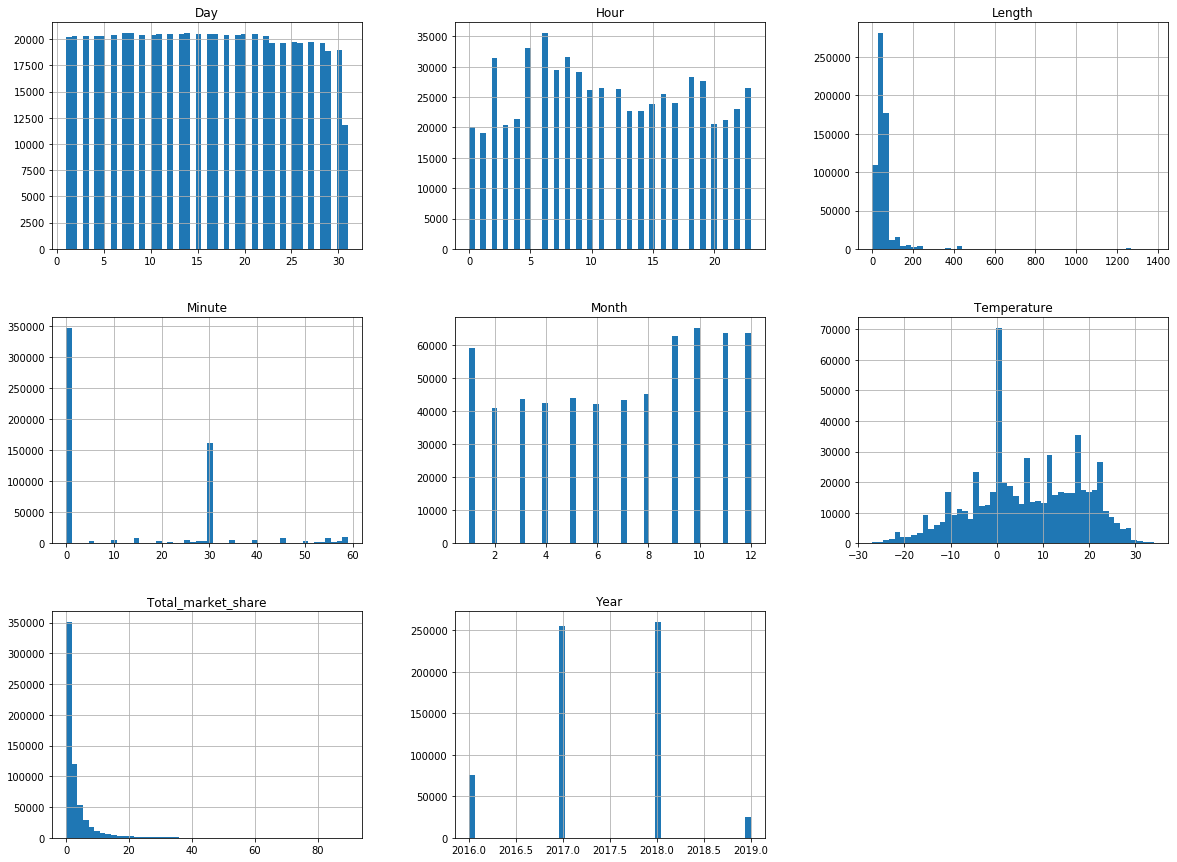

In [209]:
# Plotting numerical features

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [210]:
df.Length.describe()

count    616597.000000
mean         49.742671
std          79.189822
min           0.000000
25%          30.000000
50%          30.000000
75%          60.000000
max        1380.000000
Name: Length, dtype: float64

In [211]:
# df.to_csv('cleaned.csv')

In [214]:
# analyzing correlation coefficeints
corr_matrix = df.corr()
corr_matrix["Total_market_share"].sort_values(ascending=False)

Total_market_share    1.000000
Minute                0.097855
Hour                  0.044933
Length                0.013337
Temperature           0.012695
Month                 0.006238
Day                   0.002004
Year                 -0.019336
Name: Total_market_share, dtype: float64

# Using a Regressor

In [218]:
from sklearn.model_selection import train_test_split
y = df['Total_market_share']
data = df.copy(deep=True)
data.drop(columns=['Total_market_share'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [223]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(493277, 18) (493277,)
(123320, 18) (123320,)


In [226]:
# from sklearn.ensemble import RandomForestRegressor

# regr = RandomForestRegressor(max_depth=6, random_state=42, criterion='mae')
# regr.fit(X_train, y_train)